In [1]:
from nanomesh.generator import Generator
import SimpleITK as sitk
from nanomesh.utils import show_slice, show_volume, generate_mesh_from_binary_image

import numpy as np

import math

The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.


In [2]:
gen = Generator(680, math.sqrt(2)*680, 0.24*680)

# Possible rotation/transformation of the coordinate system
theta = math.pi * 1/180
c = math.cos(theta)
s = math.sin(theta)
trans = np.array([
    [ c, 0, s],
    [ 0, 1, 0],
    [-s, 0, c]
])

vol = gen.generate([100,100,100], [10,10,10], transform=trans, bin_val=[0.,1.])
# Convert to ITK image

im = sitk.GetImageFromArray(vol.astype('uint8'))
show_slice(im, dim='z',scale=2)

interactive(children=(IntSlider(value=49, description='z', max=99), Output()), _dom_classes=('widget-interact'…

In [13]:
mesh = generate_mesh_from_binary_image(im, h=[2]*3, facet_distance=0.5)
import pyvista as pv
pv.plot_itk(mesh)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

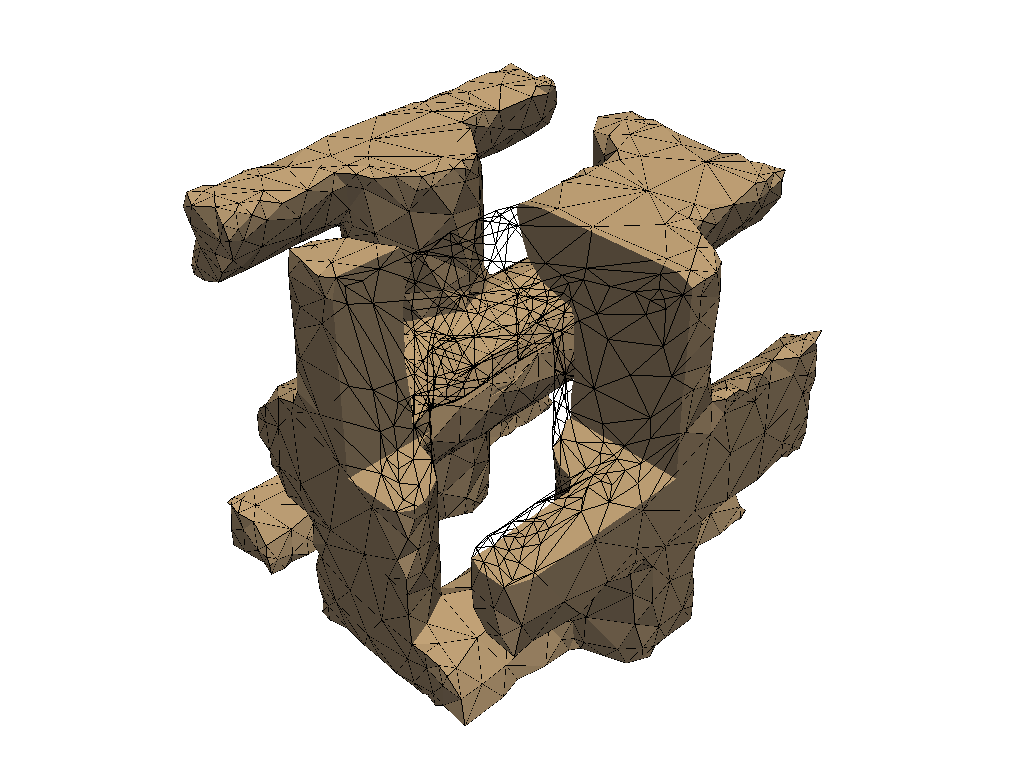

In [7]:
import meshio
import pygmsh
meshio.write('ideal_twophase.vtk',mesh)

mesh = pv.read('ideal_twophase.vtk')

bounds = [50,100,50,100,50,100]
clipped = mesh.clip_box(bounds)
pv.set_plot_theme("document")

p = pv.Plotter(notebook=True)
p.add_mesh(mesh, style='wireframe', color='black')
p.add_mesh(clipped)
p.show()